In [1]:
import time, sys

# Import the Qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QiskitError
from qiskit import execute, IBMQ, BasicAer, transpiler, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.mapper import Layout

## Define your backend

In [2]:
from qiskit import IBMQ

# insert your token & URL here
IBMQ.enable_account('<your token>', url='<your url>')

# check available backends
print("Available backends:")
IBMQ.backends()

Remote backend "ibmqx_qasm_simulator" could not be instantiated due to an invalid config: {'conditional': ['Missing data for required field.'], 'basis_gates': ['Missing data for required field.'], 'local': ['Missing data for required field.'], 'memory': ['Missing data for required field.'], 'backend_version': ['Missing data for required field.'], 'max_shots': ['Missing data for required field.'], 'open_pulse': ['Missing data for required field.'], 'n_qubits': ['Missing data for required field.'], 'gates': {0: {'name': ['Missing data for required field.'], 'qasm_def': ['Missing data for required field.'], 'parameters': ['Missing data for required field.']}}, 'backend_name': ['Missing data for required field.']}


Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-ornl, bes-qis, argonne)>]

## Define the layout

In [3]:
# execute on the IBM Tokyo 20 Qubit Machine
backend = IBMQ.get_backend('ibmq_20_tokyo')
print(backend)
backend.status()

ibmq_20_tokyo


BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.2.5', operational=True, pending_jobs=0, status_msg='active')

## Define the UCCSD ansatz circuit

In [4]:
def get_ucc_ansatz(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.ry(theta, 1)
    circuit.cx(1, 0)
    return circuit

## Define the naive measurement circuits
more automations can be done in here

In [5]:
# define the number of shots
shots = 1000

def measure_zi(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/shots


def measure_iz(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/shots


def measure_xx(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0))/shots


def measure_yy(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(1)
    circuit.sdg(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    counts = job.result().get_counts(circuit)
    return (counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0))/shots

def measure_hamiltonian(theta):
    return 5.9 + .22 * measure_zi(theta) - 6.1 * measure_iz(theta) - 2.14 * measure_xx(theta) - 2.14 * measure_yy(theta)

### run the experiment with different theta value

In [6]:
import numpy as np
import qiskit
values = []
for theta in np.arange(-np.pi, np.pi, np.pi / 6):
    values.append(measure_hamiltonian(theta))
    # print out the values after each runs in order to save progress from program collapse/network issue
    print('theta is: ')
    print(theta)
    print('the current values[] array is: ')
    print(values)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-3.141592653589793
the current values[] array is: 
[11.77248]
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-2.6179938779914944
the current values[] array is: 
[11.77248, 12.465000000000002]
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-2.0943951023931957
the current values[] array is: 
[11.77248, 12.465000000000002, 11.226320000000001]
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-1.570796326794897
the current values[] array is: 
[11.77248, 12.465000000000002, 11.226320000000001, 8.612680000000

### Plot the results
Superimpose the results of the simultaneous measurements and that of the naive measurement

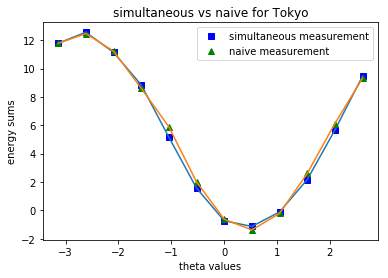

In [31]:
# simulated results copied from the other ipython notebook
values_simulated = [12.318439999999999, 13.70312, 12.840320000000002, 10.260440000000001, 6.42872, 2.7654000000000014, -0.4627999999999991, -1.6761599999999992, -1.1323599999999996, 1.9101599999999999, 5.18572, 9.35652]
# physical results from Tokyo 20 for naive measurement method
values_physical = [11.77248, 12.465000000000002, 11.226320000000001, 8.612680000000001, 5.894, 2.0026800000000016, -0.6282799999999995, -1.3829999999999996, -0.22271999999999914, 2.59764, 6.116479999999999, 9.31788]
# array of theta values
thetas = [-3.141592653589793, -2.6179938779914944, -2.0943951023931957, -1.570796326794897, -1.0471975511965983, -0.5235987755982996, -8.881784197001252e-16, 0.5235987755982978, 1.0471975511965965, 1.5707963267948948, 2.094395102393194, 2.617993877991493]
# physical results from Tokyo 20 for simultaneous measurement method
values2_physical = [11.78468, 12.558240000000001, 11.13888, 8.84964, 5.1592400000000005, 1.5702000000000012, -0.7365999999999993, -1.1382, -0.11680000000000001, 2.16244, 5.65808, 9.46308]

# plot them!
import matplotlib.pyplot as plt
plt.plot(thetas, values2_physical, 'bs', label = 'simultaneous measurement')
plt.plot(thetas, values2_physical)
plt.plot(thetas, values_physical, 'g^', label = "naive measurement")
plt.plot(thetas, values_physical)
plt.legend(loc='best')
plt.title('simultaneous vs naive for Tokyo')
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()


### Plot the difference of simultaneous vs naive for Tokyo 20

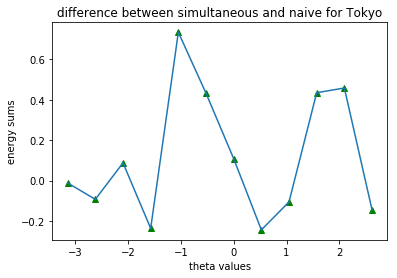

In [30]:
diff = []
for i in range(len(thetas)):
    diff.append(values_physical[i] - values2_physical[i])

plt.plot(thetas, diff, 'g^')
plt.plot(thetas, diff)
plt.title('difference between simultaneous and naive for Tokyo')
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()

## Define the simultaneous measurement circuits
more automations can be done in here

In [7]:
# define the number of shots
shots = 1000

def measure_zi_and_iz(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    counts = job.result().get_counts(circuit)
    zi = (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/shots
    iz = (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/shots
    return zi, iz

def measure_xx_and_yy(theta):
    circuit = get_ucc_ansatz(theta)
    circuit.h(1)
    circuit.cx(1, 0)
    circuit.cz(0, 1)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots)
    job_monitor(job)
    counts = job.result().get_counts(circuit)
    xx = (counts.get('00', 0) + counts.get('10', 0) - counts.get('11', 0) - counts.get('01', 0))/shots
    yy = (counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0))/shots
    return xx, yy

def measure_simultaneously_hamiltonian(theta):
    xx, yy = measure_xx_and_yy(theta)
    zi, iz = measure_zi_and_iz(theta)
    return 5.9 + .22 * zi - 6.1 * iz - 2.14 * xx - 2.14 * yy

### Run the experiment with different theta value

In [10]:
import qiskit
import numpy as np
values2 = []
for theta in np.arange(-np.pi, np.pi, np.pi / 6):
    values2.append(measure_simultaneously_hamiltonian(theta))
    
    # print out the values after each runs in order to save progress from program collapse/network issue
    print('theta is: ')
    print(theta)
    print('the current values[] array is: ')
    print(values2)

Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-3.141592653589793
the current values[] array is: 
[11.78468]
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-2.6179938779914944
the current values[] array is: 
[11.78468, 12.558240000000001]
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-2.0943951023931957
the current values[] array is: 
[11.78468, 12.558240000000001, 11.13888]
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-1.570796326794897
the current values[] array is: 
[11.78468, 12.558240000000001, 11.13888, 8.84964]
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-1.0471975511965983
the current values[] array is: 
[11.78468, 12.558240000000001, 11.13888, 8.84964, 5.1592400000000005]
Job Status: job has successfully run
Job Status: job has successfully run
theta is: 
-0.5235987755982996
the curre

### plot the results for the simultaneous measurement

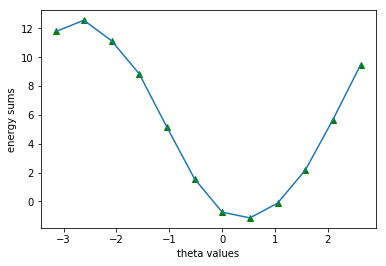

In [19]:
values2_physical = [11.78468, 12.558240000000001, 11.13888, 8.84964, 5.1592400000000005, 1.5702000000000012, -0.7365999999999993, -1.1382, -0.11680000000000001, 2.16244, 5.65808, 9.46308]
thetas = []
for theta in np.arange(-np.pi, np.pi, np.pi/6):
    # put the theta values to a list for plotting
    thetas.append(theta)
import matplotlib.pyplot as plt
plt.plot(thetas, values2_physical, 'g^')
plt.plot(thetas, values2_physical)
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()

### Calculate and plot the difference between results obtained from the simulator and from Tokyo 20

In [20]:
# simulated values copied from the other ipython notebook
values2_simulated = [12.2842, 13.644680000000001, 12.96908, 10.20912, 6.76572, 2.5197200000000013, -0.45851999999999904, -1.7290799999999997, -1.2657199999999995, 1.5503200000000001, 5.36568, 9.352079999999997]
diff_phys_sim = []
for theta in range(len(thetas)):
    diff_phys_sim.append(values2_physical[theta] - values2_simulated[theta])

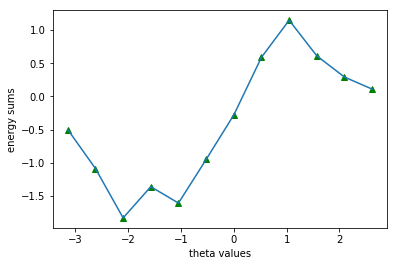

In [21]:
import matplotlib.pyplot as plt
plt.plot(thetas, diff_phys_sim, 'g^')
plt.plot(thetas, diff_phys_sim)
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()